# Carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Data Science - Skillnet/Ejercicios core Machine Learning/BBDD/house-prices.csv'

df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [ ]:
df.head (10)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


#Limpieza de datos

In [ ]:
#Cambiamos las columnas en minusculas sustituir espacios por guiones bajos.
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   home          128 non-null    int64 
 1   price         128 non-null    int64 
 2   sqft          128 non-null    int64 
 3   bedrooms      128 non-null    int64 
 4   bathrooms     128 non-null    int64 
 5   offers        128 non-null    int64 
 6   brick         128 non-null    object
 7   neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [ ]:
#Búsqueda de duplicados.
df.duplicated().sum()

np.int64(0)

In [ ]:
#Valores nulos.

df.isnull().sum()

,0
home,0
price,0
sqft,0
bedrooms,0
bathrooms,0
offers,0
brick,0
neighborhood,0


#EDA

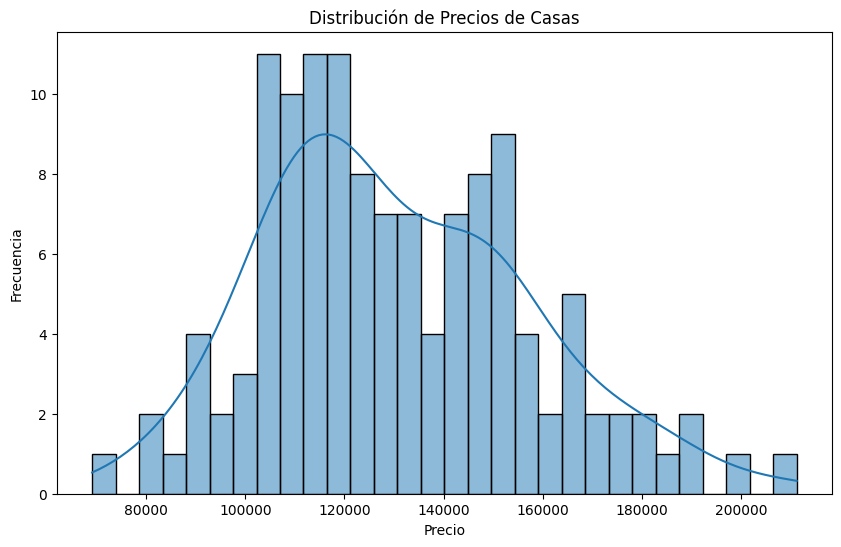

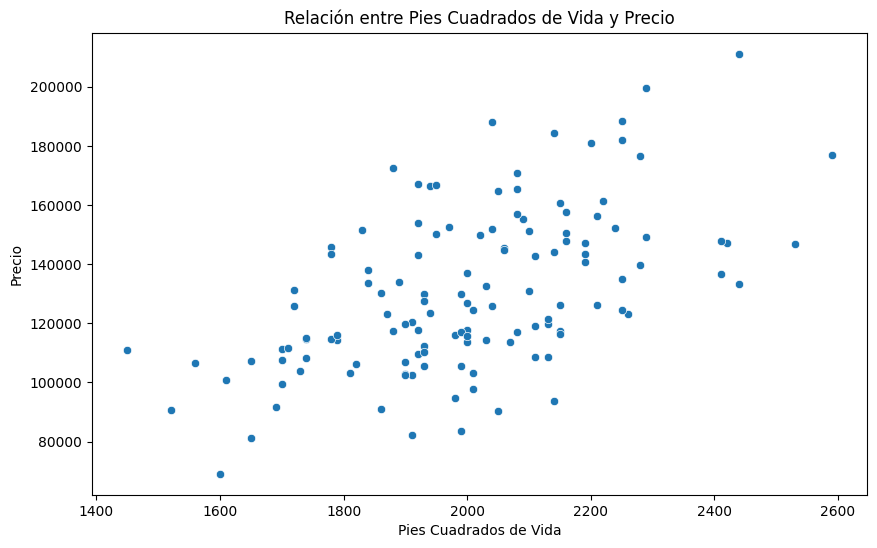

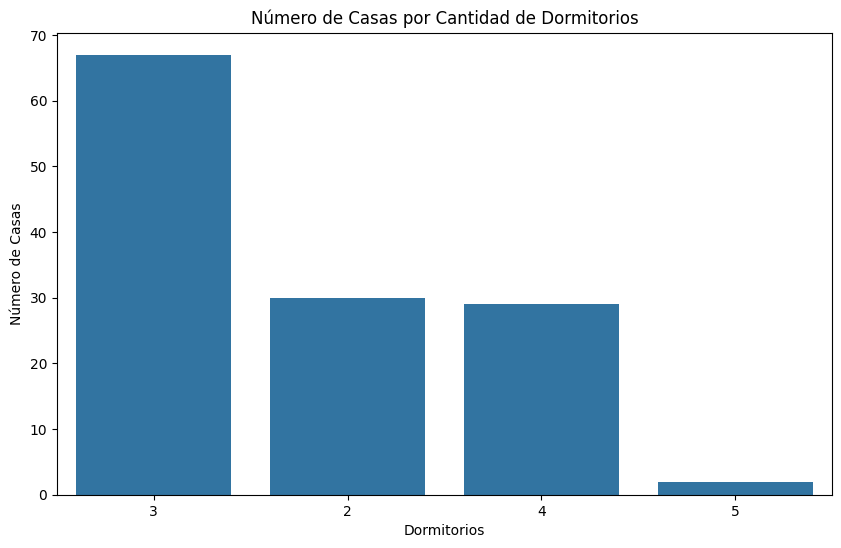

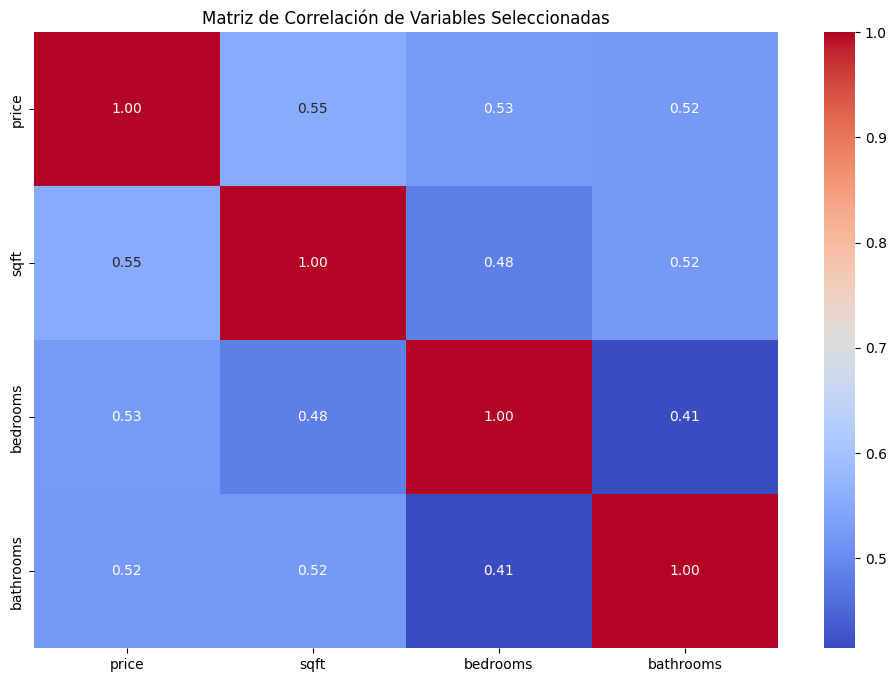

In [ ]:

# Histograma de la variable objetivo 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de Precios de Casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión entre 'sqft_living' y 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y='price', data=df)
plt.title('Relación entre Pies Cuadrados de Vida y Precio')
plt.xlabel('Pies Cuadrados de Vida')
plt.ylabel('Precio')
plt.show()

# Gráfico de barras de la cuenta de casas por 'bedrooms'
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, order=df['bedrooms'].value_counts().index)
plt.title('Número de Casas por Cantidad de Dormitorios')
plt.xlabel('Dormitorios')
plt.ylabel('Número de Casas')
plt.show()

# Matriz de correlación para algunas variables numéricas importantes
numerical_cols = ['price', 'sqft','bedrooms', 'bathrooms']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()


**Histograma de Precios:** - La distribución de los precios de las casas muestra un sesgo hacia la derecha (asimetría positiva). Esto indica que la mayoría de las viviendas tienen precios en el rango más bajo, con pocas propiedades con precios muy elevados. Este patrón es común en datos de bienes raíces.

**Gráfico de Dispersión (sqft_living vs. Precio):** -Existe una correlación positiva entre el área habitable en pies cuadrados (sqft) y el precio de la casa. A medida que aumenta el área habitable, el precio también tiende a aumentar. El gráfico también muestra algunos valores atípicos (outliers), que son casas con precios inusualmente altos o bajos en relación a su tamaño.

**Gráfico de Barras de Habitaciones:** - El diagrama de conteo muestra la frecuencia de casas según el número de habitaciones. La mayoría tiene entre 2 y 5 dormitorios, siendo 3 el más común. Hay muy pocas viviendas con un número elevado de habitaciones.

**Matriz de Correlación:**

-Price tiene una fuerte correlación positiva con sqft (área habitable), lo que respalda lo observado en el gráfico de dispersión.

-price también muestra una correlación positiva (aunque más débil) con bedrooms (dormitorios) y bathrooms (baños).

-Hay correlaciones positivas entre las propias características (ej. sqft con bedrooms y bathrooms), lo cual es esperado, ya que casas más grandes suelen tener más dormitorios y baños.



# Diagnóstico y Selección de Problema:

**Características del dataset:** El conjunto contiene datos de precios y características de viviendas (como metros cuadrados, dormitorios y baños) que muestran correlación positiva con el precio, aunque con una distribución sesgada y posibles valores atípicos. Es un dataset pequeño (128 registros), completo (sin nulos/duplicados), pero con variables categóricas como material de construcción y vecindario aún no exploradas.

**Desafíos principales:** El sesgo en los precios, la presencia de outliers, el tamaño reducido del dataset (que limita modelos complejos) y la necesidad de codificar variables categóricas plantean retos técnicos para el modelado.

**Elección del problema:** Se optó por predecir precios (regresión) dado su valor práctico en bienes raíces, la clara relación entre características y precio evidenciada en el EDA, y la adecuación a datos numéricos. Aunque el tamaño pequeño exige modelos simples, el problema permite explorar técnicas clave como manejo de sesgo y outliers.